In [ ]:
!pip install tensorflow keras opencv-python matplotlib numpy

In [12]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl (41.2 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)


In [20]:
!pip install --upgrade pip setuptools wheel
!pip install tensorflow



  Using cached setuptools-78.1.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools-78.1.0-py3-none-any.whl (1.3 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.5.0
    Uninstalling setuptools-65.5.0:
      Successfully uninstalled setuptools-65.5.0
  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl (375.9 MB)


In [22]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available:", len(tf.config.list_physical_devices('GPU')) > 0)

TensorFlow version: 2.19.0
GPU Available: False


In [23]:
import torch
print("CUDA Available:", torch.cuda.is_available())

CUDA Available: False


✅ Dataset folders found!
Found 795 images belonging to 2 classes.
Found 773 images belonging to 2 classes.


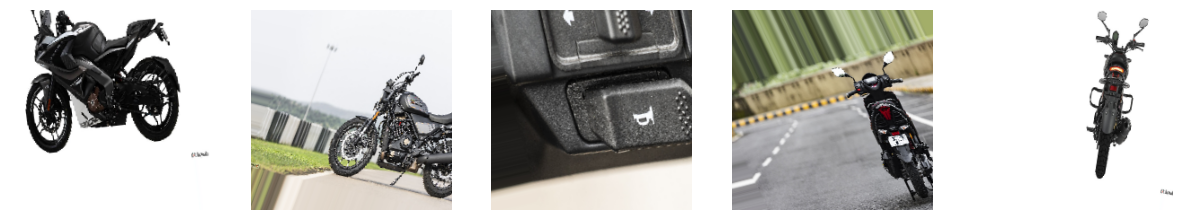

In [14]:
# ✅ 1. Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')


# ✅ 3. Import necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# ✅ 4. Set the correct dataset paths (Update this based on your Drive structure)
train_data_path = "data\\train"  # Change YOUR_FOLDER_NAME
val_data_path = "data\\validation"  # Change YOUR_FOLDER_NAME

# ✅ 5. Verify if dataset folders exist
if not os.path.exists(train_data_path):
    raise FileNotFoundError(f"❌ Training data path '{train_data_path}' does not exist. Check your Google Drive path.")

if not os.path.exists(val_data_path):
    raise FileNotFoundError(f"❌ Validation data path '{val_data_path}' does not exist. Check your Google Drive path.")

print("✅ Dataset folders found!")

# ✅ 6. Data augmentation & preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# ✅ 7. Load dataset with ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    val_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# ✅ 8. Display a batch of training images
def show_sample_images(generator):
    images, labels = next(generator)
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for i in range(5):
        axes[i].imshow(images[i])
        axes[i].axis('off')
    plt.show()

# Show some training images
show_sample_images(train_generator)


In [15]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Load pre-trained model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [24]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

# Save the model
model.save('scooter_classifier.h5')

d:\Projects\Ather\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
 4/24 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.4928 - loss: 1.2516

d:\Projects\Ather\.venv\Lib\site-packages\PIL\Image.py:3438: DecompressionBombWarning: Image size (95656288 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


24/24 ━━━━━━━━━━━━━━━━━━━━ 103s 4s/step - accuracy: 0.5876 - loss: 1.1703 - val_accuracy: 0.7799 - val_loss: 0.4412
Epoch 2/20
 1/24 ━━━━━━━━━━━━━━━━━━━━ 20s 898ms/step - accuracy: 0.7812 - loss: 0.5863

d:\Projects\Ather\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


24/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7812 - loss: 0.5863 - val_accuracy: 0.7786 - val_loss: 0.4487
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.7975 - loss: 0.4574 - val_accuracy: 0.8320 - val_loss: 0.3205
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.7812 - loss: 0.5224 - val_accuracy: 0.8542 - val_loss: 0.2961
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.8290 - loss: 0.3648 - val_accuracy: 0.8906 - val_loss: 0.2433
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8438 - loss: 0.2861 - val_accuracy: 0.8945 - val_loss: 0.2413
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.8589 - loss: 0.3154 - val_accuracy: 0.9023 - val_loss: 0.2498
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8125 - loss: 0.3540 - val_accuracy: 0.9336 - val_loss: 0.2235
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.8702 - loss: 0.3151 - val_accuracy: 0.9258 - val_loss: 0.1989
Epo

In [ ]:
!pip install seaborn

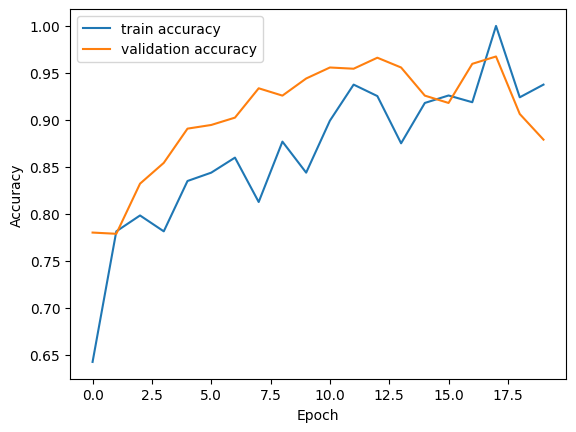

Found 773 images belonging to 2 classes.


d:\Projects\Ather\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7410 - loss: 0.4607
Test accuracy: 87.97%
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step


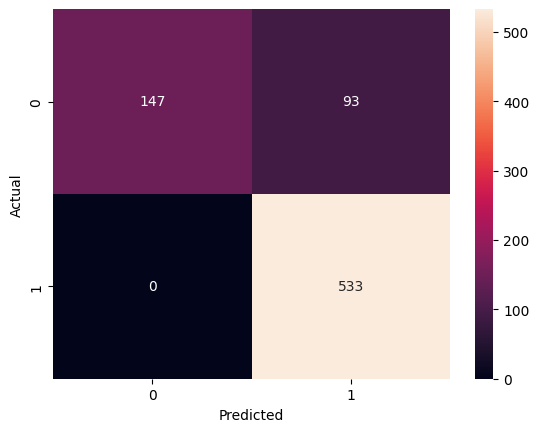

In [29]:
# Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate on test set
test_generator = val_datagen.flow_from_directory(
    'data\\test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy*100:.2f}%')

# Generate confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype("int32")

cm = confusion_matrix(test_generator.classes, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [48]:
image_path = "data\\test\\ather\\450x450xrightfrontthreequarter (10).jpeg"

In [49]:
# Function to classify new images
def classify_scooter(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    if prediction[0][0] > 0.5:
        return "Other Scooter"
    else:
        return "Ather Scooter"

# Test with a new image
print(classify_scooter(image_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
Ather Scooter


In [59]:
image_path = "data\\test\\non ather\\450x450xelectricbikecharginginputplug.jpeg"

In [60]:
# Function to classify new images
def classify_scooter(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    if prediction[0][0] > 0.5:
        return "Other Scooter"
    else:
        return "Ather Scooter"

# Test with a new image
print(classify_scooter(image_path))

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [54]:
import pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)